<a href="https://colab.research.google.com/github/JohnnyPassos/calculo_metricas_ML/blob/main/CalculoMetricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
vp = 150
vn = 120
fp = 80
fn = 60


In [ ]:
#
# ----- FERRAMENTAS DE CÁLCULO DE MÉTRICAS -----
#

def calcular_sensibilidade(vp, fn):
  """Calcula a métrica de Sensibilidade (Recall ou Taxa de Verdadeiros Positivos)."""
  # Evita divisão por zero
  if (vp + fn) == 0:
    return 0
  return vp / (vp + fn)

def calcular_especificidade(vn, fp):
  """Calcula a métrica de Especificidade (ou Taxa de Verdadeiros Negativos)."""
  # Evita divisão por zero
  if (vn + fp) == 0:
    return 0
  return vn / (vn + fp)

def calcular_acuracia(vp, vn, fp, fn):
  """Calcula a Acurácia geral do modelo."""
  total_elementos = vp + vn + fp + fn
  # Evita divisão por zero
  if total_elementos == 0:
    return 0
  return (vp + vn) / total_elementos

def calcular_precisao(vp, fp):
  """Calcula a métrica de Precisão do modelo."""
  # Evita divisão por zero
  if (vp + fp) == 0:
    return 0
  return vp / (vp + fp)

def calcular_fscore(vp, fn, fp):
  """Calcula o F1-Score, que é a média harmônica entre precisão e sensibilidade."""
  # Reutiliza as funções que já criamos!
  p = calcular_precisao(vp, fp)
  s = calcular_sensibilidade(vp, fn)

  # Evita divisão por zero
  if (p + s) == 0:
    return 0

  return 2 * (p * s) / (p + s)

In [ ]:
#
# ----- PASSO 4: EXECUTAR OS CÁLCULOS E APRESENTAR AS DESCOBERTAS -----
#

# 1. Nossos dados de entrada (o cenário definido)
vp = 150
vn = 120
fp = 80
fn = 60

# 2. Chamar cada função e armazenar o resultado em uma nova variável
acuracia = calcular_acuracia(vp, vn, fp, fn)
sensibilidade = calcular_sensibilidade(vp, fn)
especificidade = calcular_especificidade(vn, fp)
precisao = calcular_precisao(vp, fp)
fscore = calcular_fscore(vp, fn, fp)

# 3. Imprimir os resultados de forma organizada
# A letra 'f' antes das aspas nos permite colocar variáveis dentro do texto.
# O ': .3f' formata o número para exibir apenas 3 casas decimais.

print("--- MÉTRICAS DE AVALIAÇÃO PARA O CENÁRIO DADO ---")
print(f"Total de Amostras: {vp + vn + fp + fn}")
print("-" * 50) # Imprime uma linha para separar
print(f"Acurácia: {acuracia:.3f}")
print(f"Sensibilidade (Recall): {sensibilidade:.3f}")
print(f"Especificidade: {especificidade:.3f}")
print(f"Precisão: {precisao:.3f}")
print(f"F1-Score: {fscore:.3f}")
print("-" * 50)

--- MÉTRICAS DE AVALIAÇÃO PARA O CENÁRIO DADO ---
Total de Amostras: 410
--------------------------------------------------
Acurácia: 0.659
Sensibilidade (Recall): 0.714
Especificidade: 0.600
Precisão: 0.652
F1-Score: 0.682
--------------------------------------------------


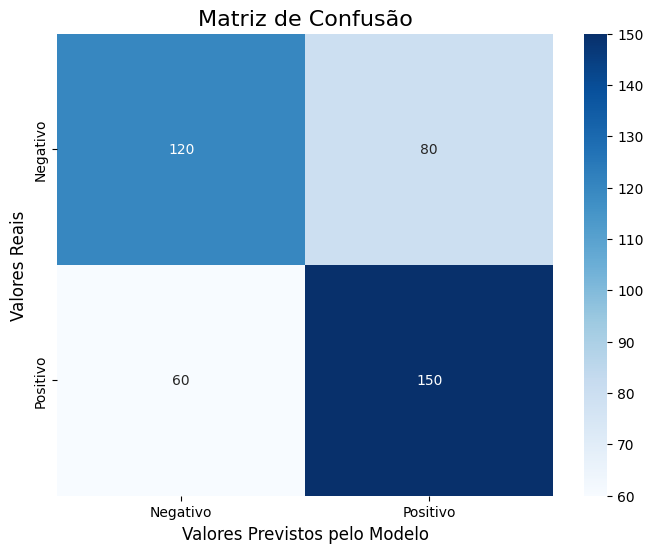

In [ ]:
#
# ----- BÔNUS: VISUALIZAÇÃO DA MATRIZ DE CONFUSÃO -----
#

# Importando as bibliotecas necessárias para o gráfico
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Nossos dados de entrada
vp = 150
vn = 120
fp = 80
fn = 60

# Organizando os dados em uma matriz 2x2 para o gráfico
# O formato padrão é: [[Verdadeiro Negativo, Falso Positivo], [Falso Negativo, Verdadeiro Positivo]]
matriz_confusao = np.array([[vn, fp],
                            [fn, vp]])

# Criando a figura e o eixo com um tamanho bom
fig, ax = plt.subplots(figsize=(8, 6))

# Criando o mapa de calor (heatmap) com o Seaborn
sns.heatmap(matriz_confusao,
            annot=True,         # anota os números em cada célula
            fmt='d',            # formata os números como inteiros
            cmap='Blues',       # esquema de cores
            ax=ax)              # desenha o gráfico no eixo que criamos

# Adicionando títulos e rótulos para clareza
ax.set_title('Matriz de Confusão', fontsize=16)
ax.set_xlabel('Valores Previstos pelo Modelo', fontsize=12)
ax.set_ylabel('Valores Reais', fontsize=12)

# Adicionando os nomes das classes nos eixos
ax.xaxis.set_ticklabels(['Negativo', 'Positivo'])
ax.yaxis.set_ticklabels(['Negativo', 'Positivo'])

# Exibindo o gráfico
plt.show()